# EDA of Diabetics Data

- First Step to load data frame
- Second Step to create Dictionary to converge into one dataset. This will make reading the inital dataset a little easier. 

In [31]:
#Libraries to load
import pandas as pd
import numpy as np 
from scipy import stats

# data visualization packages 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
pd.set_option('max_columns', None)

# SMOTE package to address imbalanced classes 
from imblearn.over_sampling import SMOTE 


from warnings import filterwarnings
filterwarnings('ignore')

In [32]:
#Load DF
df = pd.read_csv('../data/diabetic_data.csv', index_col=0, na_values='?')

In [4]:
#Shape of dataframe
df.shape

(101766, 49)

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 2278392 to 443867222
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   patient_nbr               101766 non-null  int64 
 1   race                      99493 non-null   object
 2   gender                    101766 non-null  object
 3   age                       101766 non-null  object
 4   weight                    3197 non-null    object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                61510 non-null   object
 10  medical_specialty         51817 non-null   object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 


In [6]:
df.isnull().sum()

patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

In [ ]:
df['OUTPUT_LABEL'] = (df.readmitted == '<30').astype('int')

<AxesSubplot:>

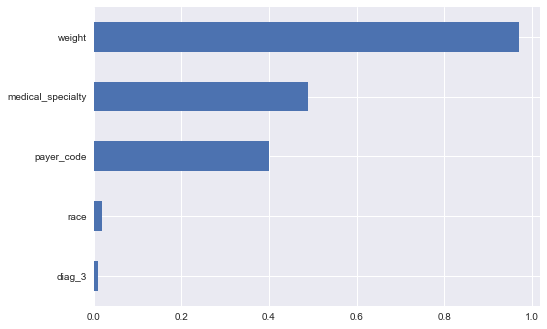

In [7]:
#Compute missingness 
missing = round((df.isna().sum()/len(df)),2).sort_values(ascending = True)
missing = missing[missing > 0]
missing.plot(kind='barh')

In [8]:
# missing values table 
missing_table = pd.DataFrame(data=missing)
missing_table

,0
diag_3,0.01
race,0.02
payer_code,0.40
medical_specialty,0.49
weight,0.97


In [9]:
# Create target column
#Set all values <30 to YES (Readmission), else all other values to NO
df.readmitted = df.readmitted.apply(lambda x: 'Yes' if x in ['<30'] else 'No')

In [10]:
df.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [11]:
#dropping features, only inspecting drugs 
df_med = df.drop(columns=['weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses'])

In [12]:
#pd.options.display.max_columns = 33
df_med.reset_index(inplace=True)
df_med

,encounter_id,patient_nbr,race,gender,age,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,149190,55629189,Caucasian,Female,[10-20),None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,No
2,64410,86047875,AfricanAmerican,Female,[20-30),None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
3,500364,82442376,Caucasian,Male,[30-40),None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,No
4,16680,42519267,Caucasian,Male,[40-50),None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,No
101762,443847782,74694222,AfricanAmerican,Female,[80-90),None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,No
101763,443854148,41088789,Caucasian,Male,[70-80),None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,No
101764,443857166,31693671,Caucasian,Female,[80-90),None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,No


In [13]:
# checking for missing values
df_med.dropna(axis=0, inplace=True)
print('Number of missing values: ',str((df_med.isna().sum() > 0).sum()))

Number of missing values:  0


# Plots

(array([0, 1, 2, 3]),
 [Text(0, 0, '>7'), Text(0, 1, 'Norm'), Text(0, 2, '>8'), Text(0, 3, 'None')])

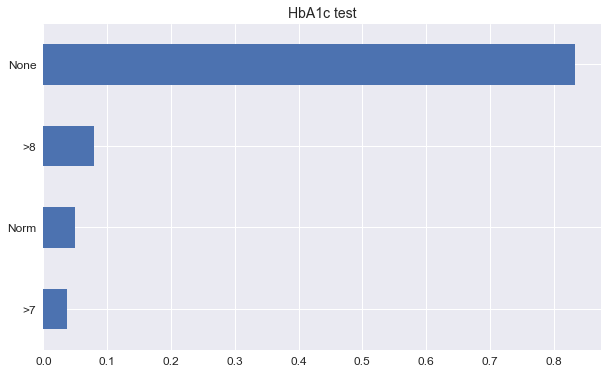

In [14]:
# HbA1c plot
plt.figure(figsize=(10,6))
a1cr_plot = df_med.A1Cresult.value_counts().sort_values().apply(lambda x: x/df_med.race.count()).plot(kind='barh')
plt.title('HbA1c test',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1]), [Text(0, 0, 'Ch'), Text(0, 1, 'No')])

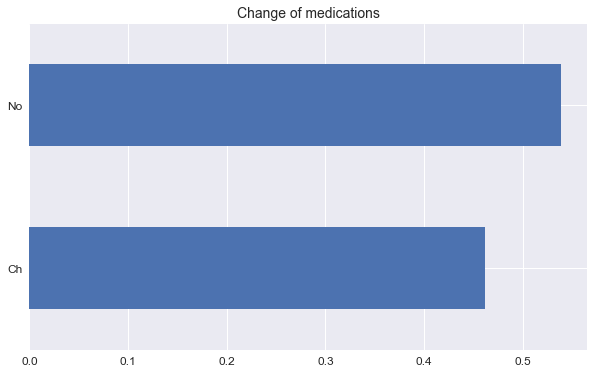

In [15]:
# Med change plot
plt.figure(figsize=(10,6))
change_plot = df_med.change.value_counts().sort_values().apply(lambda x: x/df_med.race.count()).plot(kind='barh')
plt.title('Change of medications',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

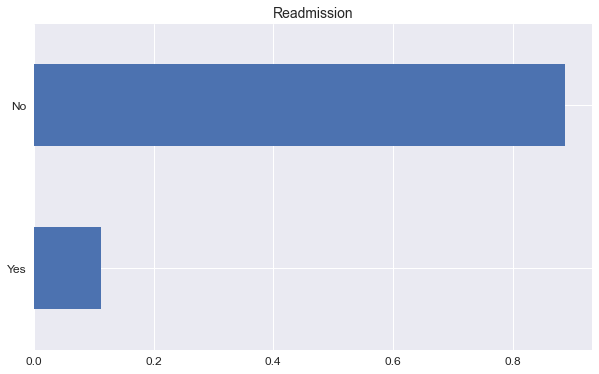

In [16]:
# Readmission plot
plt.figure(figsize=(10,6))
readmission_plot = df_med.readmitted.value_counts().sort_values().apply(lambda x: x/df_med.race.count()).plot(kind='barh')
plt.title('Readmission',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [17]:
df_med['max_glu_serum'].replace('>300','>200',inplace=True)
df_med['A1Cresult'].replace('>8','>7',inplace=True)

In [18]:
#Readmission Table 1: Max Glucouse Serum
df_med[['max_glu_serum','readmitted', 'patient_nbr']].groupby(['max_glu_serum','readmitted']).count()

patient_nbr
max_glu_serum readmitted             
>200          No                 2356
              Yes                 363
None          No                83689
              Yes               10514
Norm          No                 2279
              Yes                 292

In [19]:
#Readmission Table 2: A1C Result 
df_med[['A1Cresult','readmitted','patient_nbr']].groupby(['A1Cresult','readmitted']).count()

patient_nbr
A1Cresult readmitted             
>7        No                10517
          Yes                1174
None      No                73378
          Yes                9519
Norm      No                 4429
          Yes                 476

In [20]:
#Readmission Table 3: Gender
df_med[['gender','readmitted','patient_nbr']].groupby(['gender','readmitted']).count()

patient_nbr
gender          readmitted             
Female          No                47514
                Yes                6061
Male            No                40809
                Yes                5108
Unknown/Invalid No                    1

# Delete multiple encounters 

In [21]:
#Drop duplicate values for patient number. Keep first entry to show if patient was readmitted or not. 

df_drop = df_med.drop_duplicates('patient_nbr', keep = 'first')
#df_drop.drop('patient_nbr', axis = 1, inplace = True)